In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_root = "/mnt/data2/mtseng/dataset/SeNSE/TCH_processed/raw"
subject_id = 'c1s01'

In [3]:
df = pd.read_pickle(os.path.join(data_root, '{}.pkl'.format(subject_id)))
print(df.head())
print(df.shape)

                     Time  EcgWaveform  HR  HRConfidence  ECGNoise  \
0 2022-06-08 13:32:45.441          179  65             0       0.0   
1 2022-06-08 13:32:45.445          179  65             0       0.0   
2 2022-06-08 13:32:45.449          179  65             0       0.0   
3 2022-06-08 13:32:45.453          179  65             0       0.0   
4 2022-06-08 13:32:45.457          179  65             0       0.0   

            Timestamp  glucose    Index  
0 2022-06-08 13:33:48    132.0  19134.0  
1 2022-06-08 13:33:48    132.0  19134.0  
2 2022-06-08 13:33:48    132.0  19134.0  
3 2022-06-08 13:33:48    132.0  19134.0  
4 2022-06-08 13:33:48    132.0  19134.0  
(200691385, 8)


## Get the date ranges

In [4]:
dates = df['Timestamp'].dt.date.unique()
print(dates)

[datetime.date(2022, 6, 8) datetime.date(2022, 6, 9)
 datetime.date(2022, 6, 10) datetime.date(2022, 6, 11)
 datetime.date(2022, 6, 12) datetime.date(2022, 6, 13)
 datetime.date(2022, 6, 14) datetime.date(2022, 6, 15)
 datetime.date(2022, 6, 16) datetime.date(2022, 6, 18)
 datetime.date(2022, 6, 23) datetime.date(2022, 6, 24)
 datetime.date(2022, 6, 25) datetime.date(2022, 6, 26)
 datetime.date(2022, 6, 28)]


#### Select a random day

In [15]:
# Select a date
date = random.choice(dates)
print(date)

2022-06-09


In [21]:
sampling_rate = 250

# plot the whole day
df_day = df[df['Timestamp'].dt.date == date]
print(df_day)

                            Time  EcgWaveform  HR  HRConfidence  ECGNoise  \
6761139  2022-06-08 23:58:48.001         2086   0             0   0.00006   
6761140  2022-06-08 23:58:48.005         2087   0             0   0.00006   
6761141  2022-06-08 23:58:48.009         2089   0             0   0.00006   
6761142  2022-06-08 23:58:48.013         2089   0             0   0.00006   
6761143  2022-06-08 23:58:48.017         2089   0             0   0.00006   
...                          ...          ...  ..           ...       ...   
24793134 2022-06-09 23:58:52.982         2043   0             1   0.00008   
24793135 2022-06-09 23:58:52.986         2042   0             1   0.00008   
24793136 2022-06-09 23:58:52.990         2042   0             1   0.00008   
24793137 2022-06-09 23:58:52.994         2041   0             1   0.00008   
24793138 2022-06-09 23:58:52.998         2041   0             1   0.00008   

                   Timestamp  glucose    Index  
6761139  2022-06-09 00:03:

Since a person might remove the CGM for some time during the day, check the number of CGM segments.

In [22]:
segments = df_day['Timestamp'].diff().dt.total_seconds()
# check where the diff is greater than 330
segment_start_idx = (segments[segments > 330])
segments_indices = []
if len(segment_start_idx) > 0:
    for i in range(len(segment_start_idx)):
        if i == 0:
            segments_indices.append((df_day.index[0], segment_start_idx.index[i]))
        else:
            segments_indices.append((segment_start_idx.index[i-1], segment_start_idx.index[i]))
else:
    segments_indices.append((df_day.index[0], df_day.index[-1]))

print("Number of segments: ", len(segments_indices))

Number of segments:  1


Randomly pick one segment

In [23]:
random_segment_in_day = random.choice(segments_indices)
random_segment = df_day.loc[random_segment_in_day[0]:random_segment_in_day[1]-1]
print(random_segment)

[(6761139, 23048000)]
                            Time  EcgWaveform  HR  HRConfidence  ECGNoise  \
6761139  2022-06-08 23:58:48.001         2086   0             0   0.00006   
6761140  2022-06-08 23:58:48.005         2087   0             0   0.00006   
6761141  2022-06-08 23:58:48.009         2089   0             0   0.00006   
6761142  2022-06-08 23:58:48.013         2089   0             0   0.00006   
6761143  2022-06-08 23:58:48.017         2089   0             0   0.00006   
...                          ...          ...  ..           ...       ...   
23047995 2022-06-09 18:04:35.425         1807  70            43   0.00106   
23047996 2022-06-09 18:04:35.429         1832  70            43   0.00106   
23047997 2022-06-09 18:04:35.433         1852  70            43   0.00106   
23047998 2022-06-09 18:04:35.437         1871  70            43   0.00106   
23047999 2022-06-09 18:04:35.441         1897  70            43   0.00106   

                   Timestamp  glucose    Index  
6761

Plot the segment

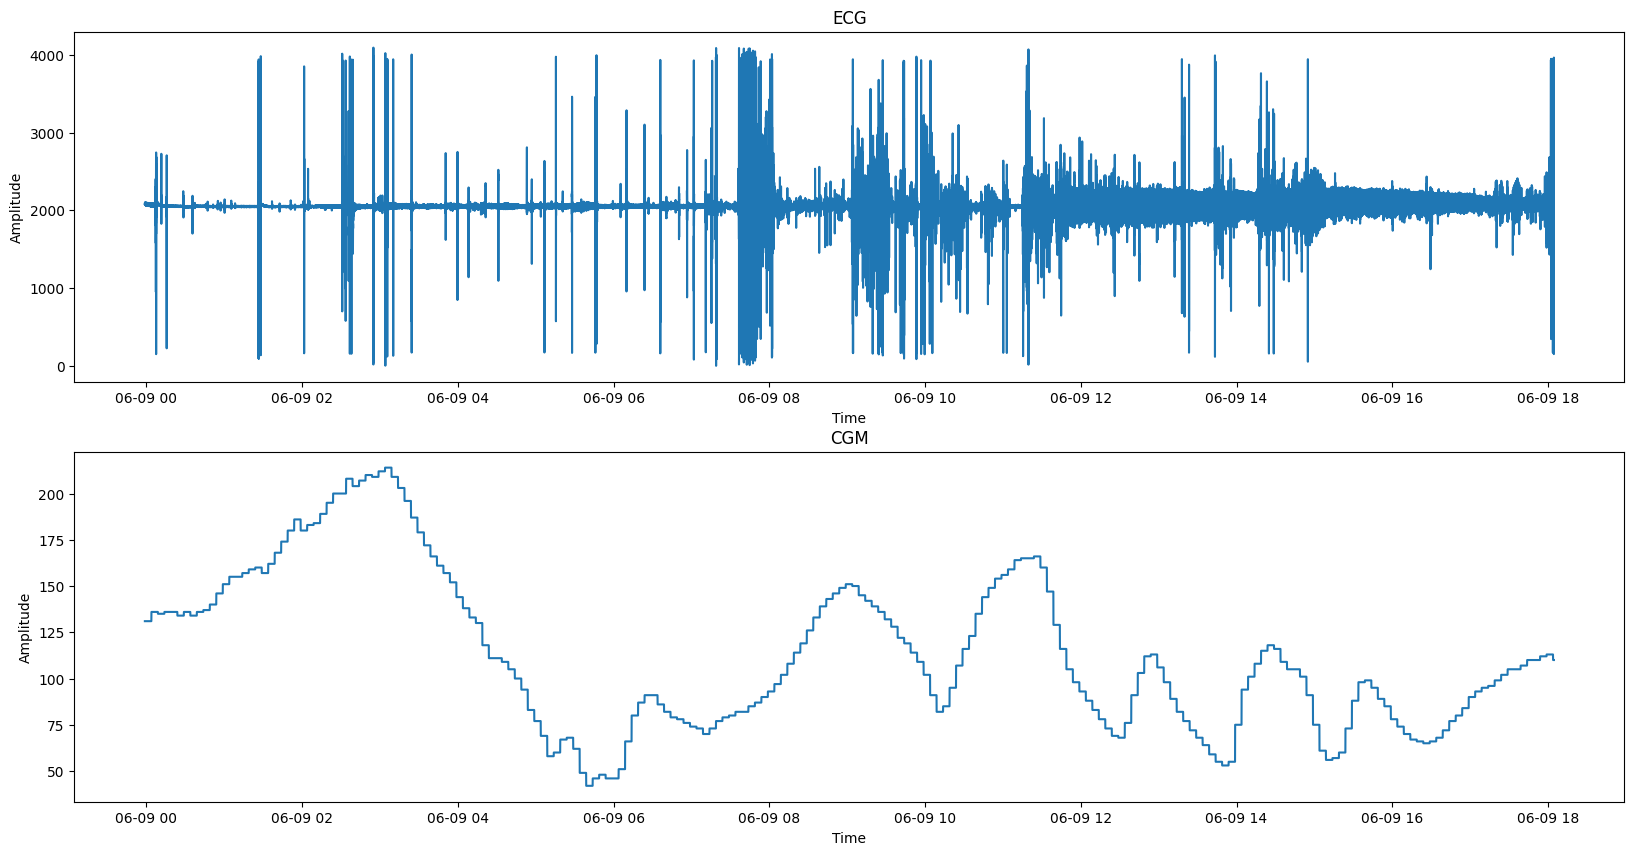

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(random_segment['Time'], random_segment['EcgWaveform'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('ECG')
ax[1].plot(random_segment['Time'], random_segment['glucose'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('CGM')
plt.show()